In [26]:
import pandas as pd 
import config
from matplotlib import pyplot as plt 
import numpy as np

In [46]:
sdta = pd.read_csv('../output/cnn_results_test_WarmProteins.csv')
sdta = sdta.drop(['uniprot_id'], axis=1).groupby(['gene_symbol', 'pert_id']).max().reset_index()
sdta = sdta.rename({'gene_symbol':'target', 'pred_pIC50':'pIC50'}, axis=1)
sdta.head()

,target,pert_id,pIC50
0,ABL1,BRD-A00546892,4.814454
1,ABL1,BRD-A01320529,5.220475
2,ABL1,BRD-A02508087,3.781848
3,ABL1,BRD-A03249105,7.306915
4,ABL1,BRD-A04352665,6.035349


In [47]:
(sdta.pIC50 > 6).mean()

0.4169747525303081

In [48]:
(sdta.pIC50 > 6).sum()

187451

In [49]:
clueinfo = pd.read_csv('../data/compoundinfo_beta.txt', sep='\t')
clueinfo = clueinfo[lambda x: x.pert_id.isin(sdta.pert_id.unique())]
clueinfo = clueinfo[['pert_id', 'target']]
clueinfo = clueinfo.assign(in_clue=True)
clueinfo.head()

,pert_id,target,in_clue
605,BRD-K43002773,AKT3,True
606,BRD-K43002773,AKT1,True
607,BRD-K43002773,AKT2,True
608,BRD-A50998626,MTOR,True
610,BRD-K70301465,BTK,True


In [50]:
res = sdta.merge(clueinfo, on=['target','pert_id'], how='left')
res = res.assign(in_clue=lambda x: [y==True for y in x.in_clue])
res = res.assign(IC50=lambda x: 10**-x.pIC50)
#res = res[lambda x: (x.IC50 < config.affinty_threshold / 1e9) | (x.in_clue)]
res.head()

,target,pert_id,pIC50,in_clue,IC50
0,ABL1,BRD-A00546892,4.814454,False,1.533014e-05
1,ABL1,BRD-A01320529,5.220475,False,6.019009e-06
2,ABL1,BRD-A02508087,3.781848,False,1.652542e-04
3,ABL1,BRD-A03249105,7.306915,False,4.932700e-08
4,ABL1,BRD-A04352665,6.035349,False,9.218303e-07


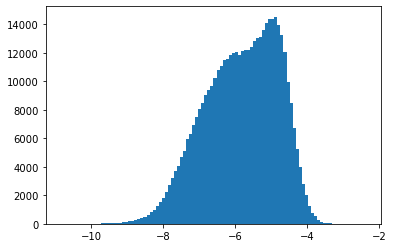

In [51]:
plt.figure()
plt.hist(np.log10(res.IC50.values), bins=100)
plt.show()

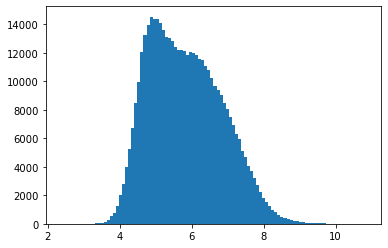

In [52]:
plt.figure()
plt.hist(res.pIC50.values, bins=100)
plt.show()

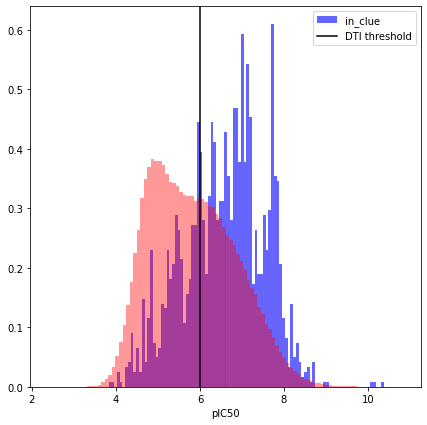

In [53]:
plt.figure(figsize=(7,7))
plt.hist(res[lambda x: x.in_clue].pIC50.values, bins=100, color='b', alpha=0.6, density=True, label='in_clue')
plt.hist(res[lambda x: ~x.in_clue].pIC50.values, bins=100, color='r', alpha=0.4, density=True)
plt.axvline(-np.log10(config.affinty_threshold/1e9), c='k', label='DTI threshold')
plt.legend()
plt.xlabel('pIC50')
plt.show()

In [56]:
(res[lambda x: x.in_clue].pIC50.values > 5).mean()

0.9353448275862069